In [ ]:
import ast
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Helper function to reconstruct the path
def reconstruct_path(parent, start, end):
    """Reconstructs the path from end to start using the parent dictionary."""
    path = []
    curr = end
    while curr is not None:
        path.append(curr)
        curr = parent.get(curr) # Use .get() to avoid errors if start is not reachable
    path.reverse()
    
    # If the path starts with the correct node, it's valid
    if path[0] == start:
        return path
    else:
        return None # No path found

In [3]:
# --- Updated BFS with Comparison Counting ---
def BFS_path(graph, start, end):
    """
    Performs BFS to find the shortest path and counts comparisons.
    Stops as soon as the destination is found.
    """
    comparisons = 0
    # Basic setup
    parent = {u: None for u in graph}
    color = {u: "WHITE" for u in graph}
    
    # Start node setup
    color[start] = "GRAY"
    Q = deque([start])

    while Q:
        u = Q.popleft()
        
        # Increment comparison count each time we visit a node
        comparisons += 1
        if u == end:
            # Destination found, stop searching
            path = reconstruct_path(parent, start, end)
            return path, len(path) - 1, comparisons

        for v in graph[u]:
            if color[v] == "WHITE":
                color[v] = "GRAY"
                parent[v] = u
                Q.append(v)
        color[u] = "BLACK"

    # If the loop finishes, the end was not reached
    return None, float('inf'), comparisons

In [4]:
# --- Updated DFS with Comparison Counting ---
# Global variables to be used by the recursive DFS_VISIT
dfs_parent = {}
dfs_comparisons = 0
path_found = False

In [5]:
def DFS_VISIT_path(graph, u, end):
    """Recursive helper for DFS that stops early."""
    global dfs_parent, dfs_comparisons, path_found

    # These are checked on each recursive call to stop early
    if path_found:
        return

    # Increment comparison count and check for destination
    dfs_comparisons += 1
    if u == end:
        path_found = True
        return

    # Explore neighbors
    for v in graph[u]:
        if v not in dfs_parent: # A simple way to track visited nodes
            dfs_parent[v] = u
            DFS_VISIT_path(graph, v, end)
            if path_found:
                return # Stop exploring further once found

def DFS_path(graph, start, end):
    """
    Performs DFS to find a path and counts comparisons.
    Stops as soon as the destination is found.
    """
    global dfs_parent, dfs_comparisons, path_found
    
    # Reset global state for a new run
    dfs_parent = {start: None}
    dfs_comparisons = 0
    path_found = False

    # Start the recursive search
    DFS_VISIT_path(graph, start, end)

    if path_found:
        path = reconstruct_path(dfs_parent, start, end)
        return path, len(path) - 1, dfs_comparisons
    else:
        # Returns total comparisons even if no path is found
        return None, float('inf'), dfs_comparisons

In [ ]:
input_lst = []
with open('input.txt') as f:
    for _ in range(3):
        input_lst.append(f.readline().strip().replace('\n', ''))

In [ ]:
# --- Main execution part ---
# (Assuming 'graph', 'source', 'destination' are already loaded from your file)
# Example from your file:
input_str = "{'u': ['v', 'x'],'v': ['y'],'w': ['y', 'z'],'x': ['v'],'y': ['x'],'z': ['z']}"
graph = ast.literal_eval(input_str)
source = 'u'
destination = 'x'

print("--- Running BFS ---")
bfs_result_path, bfs_len, bfs_comps = BFS_path(graph, source, destination)
print(f"Path found: {bfs_result_path}")
print(f"Path length: {bfs_len}")
print(f"Node comparisons made: {bfs_comps}")

print("\n--- Running DFS ---")
dfs_result_path, dfs_len, dfs_comps = DFS_path(graph, source, destination)
print(f"Path found: {dfs_result_path}")
print(f"Path length: {dfs_len}")
print(f"Node comparisons made: {dfs_comps}")

--- Running BFS ---
Path found: ['u', 'x']
Path length: 1
Node comparisons made: 3 📈

--- Running DFS ---
Path found: ['u', 'v', 'y', 'x']
Path length: 3
Node comparisons made: 4 📉



--- Generating Graph Visualization ---


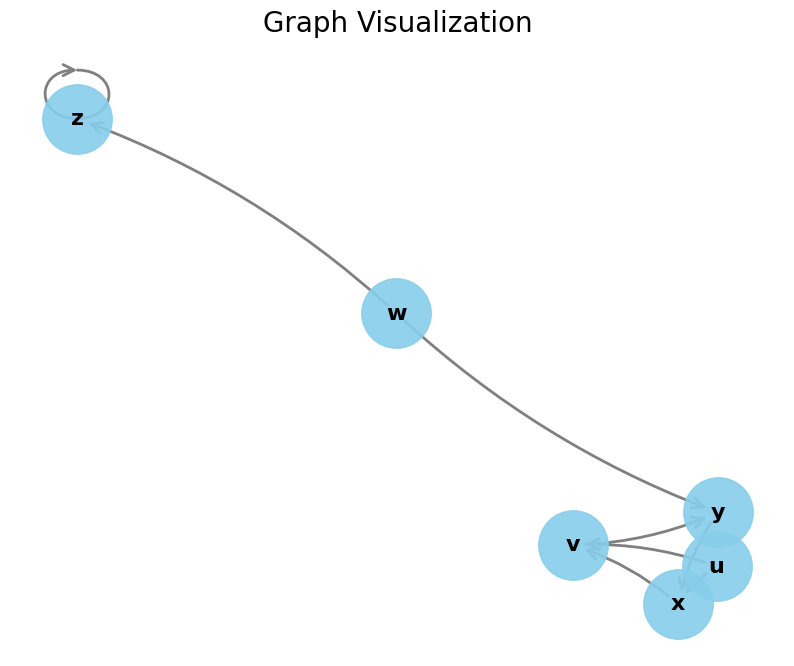

✅ Graph visualization has been saved as 'graph_visualization.png'


In [ ]:
G = nx.DiGraph(graph)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True,
                       arrowstyle='->', arrowsize=20, width=2, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

plt.title('Graph Visualization', size=20)
plt.axis('off')
# plt.savefig('graph_visualization.png')
plt.show()

# print("✅ Graph visualization has been saved as 'graph_visualization.png'")